In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MAJOR_PROJECT/DATASET/result.xlsx')
df.head(5)

Mounted at /content/drive


,Unnamed: 0,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS
0,0,"Contrast enhanced scan of the thorax, abdomen ...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma', 'no significant me...",['Two enhancing lesions nodules are seen in th...
1,1,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['Multiple (>20) bilateral lung metastases pre...
2,2,Plain and contrast enhanced scan of the brain...,choriocarcinoma,6,['brain'],"['case of choriocarcinoma, post TAH and RSO, p...",['cerebral hemispheres appear normal with no o...
3,3,"Contrast enhanced CT scan of the thorax, abdom...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['significant decrease in the size and number ...
4,4,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,6,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of Choriocarcinoma of left ovary u/w Ex...,['A tiny subpleural nodule is seen in the apic...


In [3]:
df = df.reset_index(drop=True)
df = df.sample(frac = 1)
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS
131,Contrast enhanced scan has been performed fro...,Stromal,2,['domes of diaphragm upto the ischial tuberosi...,"['-Case of endometrial stromal sarcoma, post T...","['uterus is not seen-post op status.', 'Liver ..."
23,Contrast enhanced scan has been performed for...,Endometeroid,5,"['abdomen', 'pelvis']","['case of Ca ovary, post TAH, RSO (mucinous ca...",['Uterus and right ovary are not seen- post op...
233,Contrast enhanced CT has been performed for ...,yolk sac,1,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of yolk sac tumor, post total abdominal...",['Multiple well marginated solid nodules are s...
218,Contrast enhanced scan of the abdomen and pelv...,yolk sac,1,"['abdomen', 'pelvis']","['Case of ca ovary.', 'Post staging laparotomy...","['Few liver surface deposits are seen , larges..."
187,Contrast enhanced CT has been performed for t...,Teratoma,3,"['abdomen', 'pelvis']","['case of Abdominopelvic mass', 'Baseline scan...",['predominant cystic component measuring 16.0 ...
...,...,...,...,...,...,...
147,Contrast enhanced CT has been performed for t...,Stromal,2,"['thorax', 'abdomen', 'pelvis']","['case of GCT (sex cord tumor) of right ovary,...","['urinary bladder is normal.', 'uterus appears..."
182,Contrast enhanced CT scan of the abdomen and ...,Teratoma,3,"['abdomen', 'pelvis']","['case of Ca Ovary', 'TUMOUR MARKERS: Serum CA...",['A heterogenously enhancing mass measuring 7....
150,Contrast enhanced CT scan of the abdomen and ...,Stromal,2,"['abdomen', 'pelvis', 'ABDOMEN', 'PELVIS']",['case of Granulosa cell tumour of right ovary...,['Right adnexal complex cystic lesion with enh...
52,Contrast enhanced scan of the abdomen and pelv...,muscinous adenocarcinoma,4,"['abdomen', 'pelvis']","['Case of Ca ovary, post NACT.', 'Large predom...",['Ovaries are not visualised separately from t...


In [4]:
# Combining Three column
text_columns = ['SCANNED_BODYPARTS', 'OBSERVATIONS', 'ORGAN_STATUS']
# df['combined_text'] = df[text_columns].apply(lambda row: ' '.join(row), axis=1)
df['combined_text'] = df[text_columns].apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1)

In [6]:
# Preprocessing
import string
def process_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))


    # Convert numeric values to strings
    tokens = [str(word) if not isinstance(word, str) else word for word in tokens]

    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stop_words]


    # Stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

In [7]:
# APPLY PREPROCESSING
df['combined_text'] = df['combined_text'].apply(process_text)
df['combined_text'] = df['combined_text'].apply(remove_punctuation)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
5/5 [==============================] - 6s 160ms/step - loss: 1.9511 - accuracy: 0.1711 - val_loss: 1.8476 - val_accuracy: 0.2051
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 1.8956 - accuracy: 0.2105 - val_loss: 1.7403 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 1.7847 - accuracy: 0.3224 - val_loss: 1.5507 - val_accuracy: 0.3846
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 1.6432 - accuracy: 0.3224 - val_loss: 1.5436 - val_accuracy: 0.3846
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 1.5044 - accuracy: 0.4803 - val_loss: 1.3520 - val_accuracy: 0.4615
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 1.3286 - accuracy: 0.4934 - val_loss: 1.2153 - val_accuracy: 0.5641
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 1.0886 - accuracy: 0.5724 - val_loss: 1.2147 - val_accuracy: 0.4872
Epoch 8/10
5/5 [==========

2/2 [==============================] - 0s 8ms/step
Accuracy: 0.5


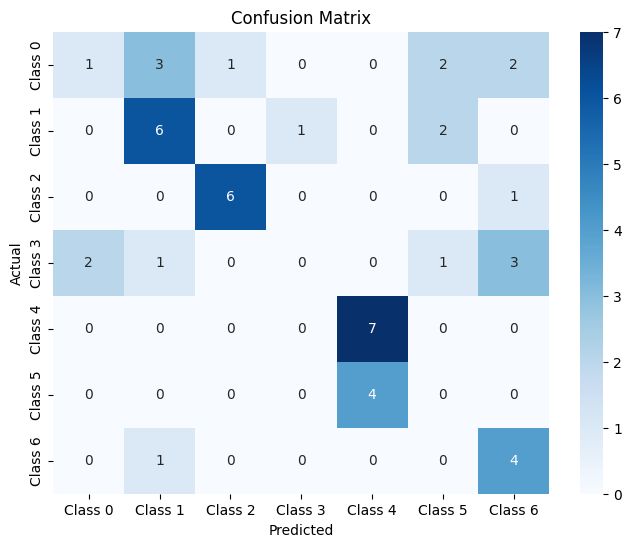

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.55      0.67      0.60         9
           2       0.86      0.86      0.86         7
           3       0.00      0.00      0.00         7
           4       0.64      1.00      0.78         7
           5       0.00      0.00      0.00         4
           6       0.40      0.80      0.53         5

    accuracy                           0.50        48
   macro avg       0.40      0.49      0.42        48
weighted avg       0.42      0.50      0.44        48



In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertModel
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.preprocessing.sequence import pad_sequences

# Assuming 'status' is the column containing labels
# Assuming '0' is the label you want to skip

X_nonzero = df['combined_text']
y_nonzero = df['label_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nonzero, y_nonzero, test_size=0.2, random_state=24)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and pad sequences
max_len = 75  # Maximum length of sequences
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, max_length=max_len, return_tensors='tf')
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, max_length=max_len, return_tensors='tf')

# Extract BERT embeddings
X_train_embeddings = bert_model(X_train_tokens)['last_hidden_state']
X_test_embeddings = bert_model(X_test_tokens)['last_hidden_state']

# Extract only the [CLS] token embeddings
X_train_cls_embeddings = X_train_embeddings[:, 0, :]  # Use only the [CLS] token embedding
X_test_cls_embeddings = X_test_embeddings[:, 0, :]

# Convert Pandas Series to NumPy array
X_train_cls_embeddings = np.array(X_train_cls_embeddings)
X_test_cls_embeddings = np.array(X_test_cls_embeddings)
# Reshape the input data for the Bidirectional LSTM layer
X_train_cls_embeddings = X_train_cls_embeddings.reshape(-1, 1, 768)
X_test_cls_embeddings = X_test_cls_embeddings.reshape(-1, 1, 768)

# Initialize a feedforward neural network
model = Sequential()
model.add(Bidirectional(LSTM(1024, activation='relu', return_sequences=True), input_shape=(1, 768)))
model.add(Bidirectional(LSTM(512, activation='relu')))

model.add(Dense(7, activation='softmax'))  # Assuming 8 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history =model.fit(X_train_cls_embeddings, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions on the test set
y_pred_prob = model.predict(X_test_cls_embeddings)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


In [13]:
from sklearn.metrics import mean_squared_error, mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 5.479166666666667
Root Mean Squared Error (RMSE): 2.340761984198023


In [14]:
cm = confusion_matrix(y_test, y_pred)
num_classes = len(cm)
specificity = []
for class_index in range(num_classes):
            true_negatives = np.sum(np.delete(np.delete(cm, class_index, axis=0), class_index, axis=1))
            false_positives = np.sum(cm[:, class_index]) - cm[class_index, class_index]
            specificity.append(true_negatives / (true_negatives + false_positives))

print("Specificity for each class:", specificity)


Specificity for each class: [0.9487179487179487, 0.8717948717948718, 0.975609756097561, 0.975609756097561, 0.9024390243902439, 0.8863636363636364, 0.8604651162790697]


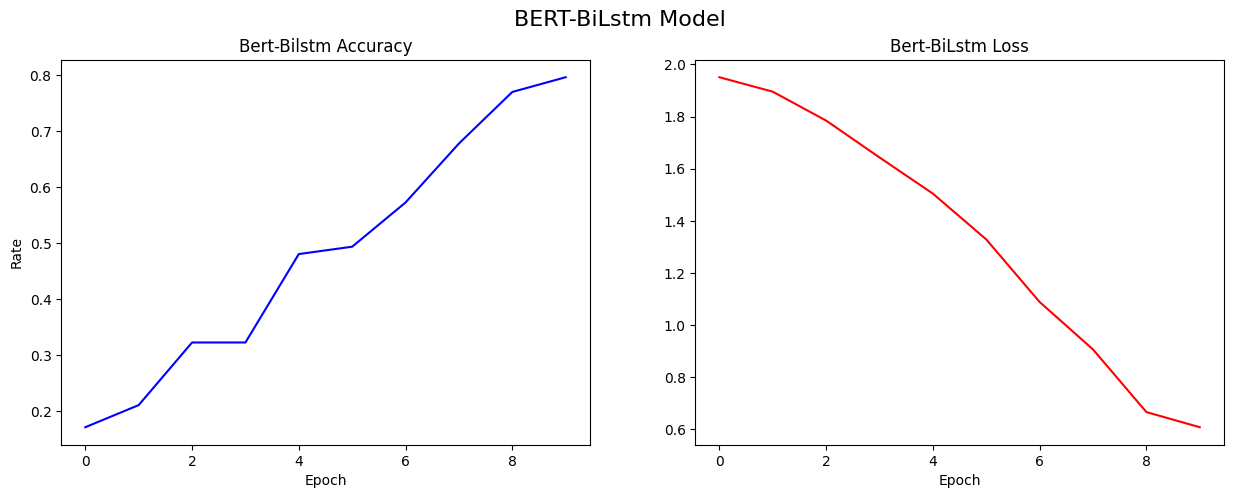

In [15]:
import matplotlib.pyplot as plt
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("Bert-Bilstm Accuracy")
axe1[1].title.set_text("Bert-BiLstm Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")

plt.suptitle('BERT-BiLstm Model ', fontsize=16)
plt.show()

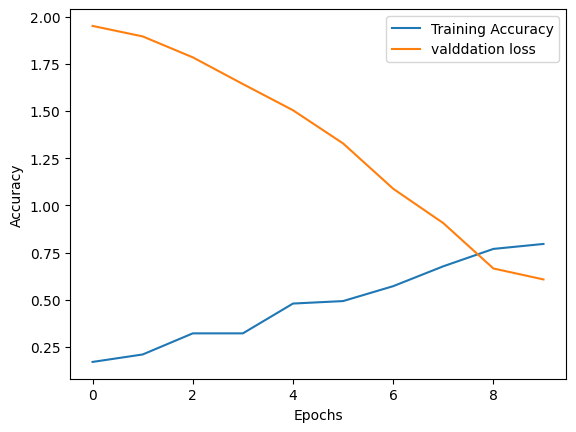

In [16]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='valddation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

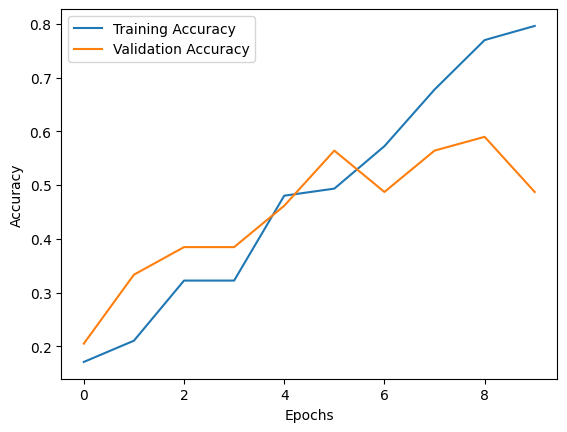

In [17]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Assuming cm is the confusion matrix
# Assuming classes are labeled as 1, 2, 3
# Class 0
tn_class0, fp_class0, fn_class0, tp_class0 = cm[0, 0], cm[0, 1:].sum(), cm[1:, 0].sum(), cm[1:, 1:].sum()
# Class 1
tn_class1, fp_class1, fn_class1, tp_class1 = cm[0, 0], cm[0, 1:].sum(), cm[1:, 0].sum(), cm[1:, 1:].sum()

# Class 2
tn_class2, fp_class2, fn_class2, tp_class2 = cm[1, 0] + cm[2, 0], cm[1, 1] + cm[2, 1], cm[0, 1] + cm[2, 1], cm[0, 0] + cm[2, 0]

# Class 3
tn_class3, fp_class3, fn_class3, tp_class3 = cm[2, 0:2].sum(), cm[2, 2], cm[0:2, 2].sum(), cm[0:2, 0:2].sum()

# Print the results
print("Class 0:")
print(f"True Positives: {tp_class1}")
print(f"True Negatives: {tn_class1}")
print(f"False Positives: {fp_class1}")
print(f"False Negatives: {fn_class1}\n")

print("Class 1:")
print(f"True Positives: {tp_class2}")
print(f"True Negatives: {tn_class2}")
print(f"False Positives: {fp_class2}")
print(f"False Negatives: {fn_class2}\n")

print("Class 2:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")


print("Class 3:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")


print("Class 4:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")

print("Class 5:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")

print("Class 6:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")

print("Class 7:")
print(f"True Positives: {tp_class3}")
print(f"True Negatives: {tn_class3}")
print(f"False Positives: {fp_class3}")
print(f"False Negatives: {fn_class3}")

Class 0:
True Positives: 27
True Negatives: 4
False Positives: 3
False Negatives: 12

Class 1:
True Positives: 4
True Negatives: 4
False Positives: 4
False Negatives: 0

Class 2:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
Class 3:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
Class 4:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
Class 5:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
Class 6:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
Class 7:
True Positives: 12
True Negatives: 0
False Positives: 4
False Negatives: 1
